<a href="https://colab.research.google.com/github/LintangAprillya/Machine-Learning_Semester5/blob/main/Machine%20Learning%20-%20Jobsheet_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

 **Job Sheet 12: Optical Character Recognition (OCR)**

---


---



---

Nama  : Lintang Aprillya Sari

Kelas : 3C

Absen : 13

NIM   : 2241720231

---



---



# **PRAKTIKUM 1**

## Instalasi dan Import Library

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,393 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

**Keterangan :**

1. !sudo apt install tesseract-ocr
   - Fungsi: Menginstal Tesseract OCR, sebuah pustaka open-source untuk Optical Character Recognition (OCR).
   - Kegunaan: Tesseract digunakan untuk mengenali teks dalam gambar dan mengonversinya menjadi teks yang dapat diedit.
   - sudo apt install: Digunakan untuk menginstal paket perangkat lunak di sistem berbasis Debian (seperti Ubuntu).
2. !pip install pytesseract
    - Fungsi: Menginstal pustaka Python bernama pytesseract, yang berfungsi sebagai antarmuka untuk mengintegrasikan Python dengan Tesseract OCR.
    - Kegunaan: Memungkinkan pengguna memanggil fungsi Tesseract OCR langsung dari skrip Python untuk pengolahan teks dalam gambar.
3. !pip install opencv-python
    - Fungsi: Menginstal pustaka OpenCV untuk Python, digunakan untuk pemrosesan gambar dan video.
    - Kegunaan: OpenCV sering digunakan untuk tugas-tugas seperti pengenalan objek, deteksi wajah, pengeditan gambar, dan integrasi dengan OCR (misalnya, untuk memproses gambar sebelum diteruskan ke Tesseract).

----

Fungsi Utama Kombinasi Perintah
Ketiga perintah ini mempersiapkan lingkungan untuk:
- Mengolah gambar menggunakan OpenCV.
- Menggunakan Tesseract OCR untuk mengekstraksi teks dari gambar yang diolah.
- Mengintegrasikan kedua pustaka melalui pytesseract.

In [2]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

**Keterangan :**

1. re: Untuk pencarian dan manipulasi teks menggunakan ekspresi reguler.
2. cv2: Untuk pemrosesan gambar dan video menggunakan OpenCV.
3. np: Untuk manipulasi array dan pengolahan data numerik dengan NumPy.
4. pytesseract: Untuk ekstraksi teks dari gambar menggunakan Tesseract OCR.
5. Output: Untuk mendapatkan hasil OCR dalam format terstruktur seperti dictionary.
6. plt: Untuk menampilkan gambar dan grafik menggunakan Matplotlib.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Keterangan :**

1. from google.colab import drive
  - Mengimpor modul drive dari Google Colab untuk mengakses Google Drive.
2. drive.mount('/content/drive')
  - Memasang (mount) Google Drive ke direktori /content/drive pada Google Colab.
  - Kegunaan: Memungkinkan akses file di Google Drive langsung dari lingkungan Colab, seperti membaca dan menyimpan file.

In [4]:
IMG_DIR = 'images-ocr/images/'

**Keterangan :**

- Fungsi:
Mendefinisikan variabel IMG_DIR yang menyimpan string berupa path (lokasi direktori) untuk folder images-ocr/images/.
- Kegunaan:
Memudahkan penggunaan path ini di seluruh kode untuk membaca atau menyimpan file gambar.

## Preprocessing images dengan OpenCV

-----

Pada tahap ini kita akan akan menulis fungsi dasar untuk metode prapemrosesan yang berbeda, meliputi:

- grayscaling

- thresholding

- dilating

- eroding

- opening

- canny edge detection

- noise removal

- deskwing

- template matching

Metode yang berbeda dapat berguna untuk jenis gambar yang berbeda

In [5]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

**Keterangan :**

1. get_grayscale(image):
  - Mengubah gambar menjadi skala abu-abu (grayscale).
  - Kegunaan: Mengurangi kompleksitas gambar untuk pemrosesan lebih lanjut.

2. remove_noise(image):
  - Menghapus noise dengan filter median.
  - Kegunaan: Membersihkan gambar dari gangguan kecil untuk meningkatkan kualitas.

3. thresholding(image):
  - Mengubah gambar menjadi biner menggunakan metode threshold Otsu.
  - Kegunaan: Memisahkan objek dari latar belakang.

4. dilate(image):
  - Memperbesar area putih (foreground) pada gambar.
  - Kegunaan: Mempertebal objek atau teks pada gambar.

5. erode(image):
  - Mengurangi area putih (foreground) pada gambar.
  - Kegunaan: Memperhalus atau mengecilkan objek.

6. opening(image):
  - Melakukan erosi diikuti dilasi (morfologi opening).
  - Kegunaan: Menghilangkan noise kecil dan mempertahankan bentuk objek.

7. canny(image):
  - Mendeteksi tepi (edges) pada gambar menggunakan algoritma Canny.
  - Kegunaan: Menyoroti kontur dan batas objek.

8. deskew(image):
  - Mengoreksi kemiringan (skew) gambar berdasarkan sudut rotasi terkecil.
  - Kegunaan: Meluruskan teks atau objek yang miring.

9. match_template(image, template):
  - Mencocokkan template dengan gambar utama menggunakan metode normalisasi koefisien korelasi.
  - Kegunaan: Mencari keberadaan template tertentu di dalam gambar.


----
----

**Fungsi Utama Kode :**


Kode ini menyediakan serangkaian operasi pemrosesan gambar, mulai dari pembersihan noise, deteksi tepi, hingga pelurusan gambar, yang sering digunakan dalam aplikasi seperti OCR atau analisis gambar.

Mari kita bekerja dengan sebuah contoh Image untuk melihat segalanya dengan lebih baik. Seperti inilah gambar asli sebelum di proses

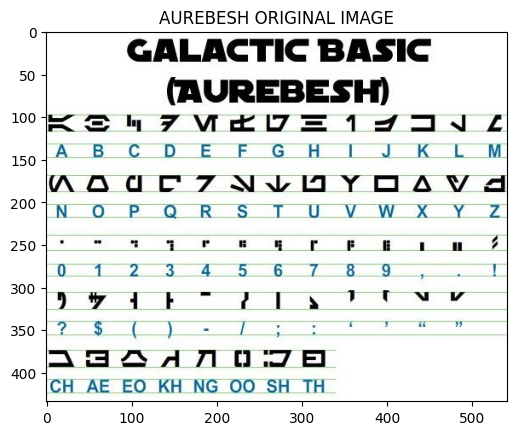

In [8]:
# Plot original image

image = cv2.imread('/content/drive/MyDrive/ML/images-ocr/images/aurebesh.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('AUREBESH ORIGINAL IMAGE')
plt.show()

**Keterangan :**

1. image = cv2.imread(...)
  
  - Membaca file gambar Aurebesh dari direktori Google Drive.
  - Format default OpenCV adalah BGR (Blue, Green, Red).

2. b, g, r = cv2.split(image)
  - Memisahkan saluran warna gambar (Blue, Green, dan Red).


3. rgb_img = cv2.merge([r, g, b])
  - Menyatukan kembali saluran warna dalam urutan RGB.
  - OpenCV bekerja dalam format BGR, sementara Matplotlib memerlukan format RGB untuk menampilkan warna dengan benar.

4. plt.imshow(rgb_img)
  - Menampilkan gambar menggunakan Matplotlib dengan format warna yang sesuai.


5. plt.title('AUREBESH ORIGINAL IMAGE')
  - Menambahkan judul pada plot.

6. plt.show()
  - Menampilkan gambar dengan judul di dalam jendela plot.

Selanjutnya lakukan pre-processing, dan setelah dilakukan preprocessing dengan kode berikut, makan akan didapatkan hasil imgae baru

In [9]:
# Preprocess image

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

**Keterangan :**

1. gray = get_grayscale(image)
  - Mengonversi gambar asli menjadi gambar dalam skala abu-abu.
  - Tujuan: Mengurangi informasi warna agar fokus pada intensitas piksel untuk pemrosesan lebih lanjut.

2. thresh = thresholding(gray)
  - Menerapkan thresholding untuk menghasilkan gambar biner (hitam dan putih).
  - Tujuan: Memisahkan objek dari latar belakang berdasarkan nilai intensitas piksel.

3. opening = opening(gray)
  - Melakukan operasi morfologi opening (erosi diikuti dilasi) pada gambar abu-abu.
  - Tujuan: Menghapus noise kecil dan menjaga bentuk objek.

4. canny = canny(gray)
  - Menerapkan deteksi tepi (edge detection) menggunakan algoritma Canny.
  - Tujuan: Menyoroti kontur atau batas objek dalam gambar.


5. images = {...}
  - Membuat dictionary images yang menyimpan hasil setiap langkah preprocessing dengan nama kunci:
    * 'gray' untuk gambar skala abu-abu.
    * 'thresh' untuk gambar biner.
    * 'opening' untuk gambar hasil operasi morfologi.
    * 'canny' untuk gambar hasil deteksi tepi.


----
----

**Hasil Akhir :**

- Kode ini menyiapkan gambar hasil preprocessing dalam berbagai tahap untuk dianalisis lebih lanjut atau ditampilkan.
- Setiap transformasi membantu mempersiapkan gambar untuk tugas seperti OCR atau analisis fitur visual.

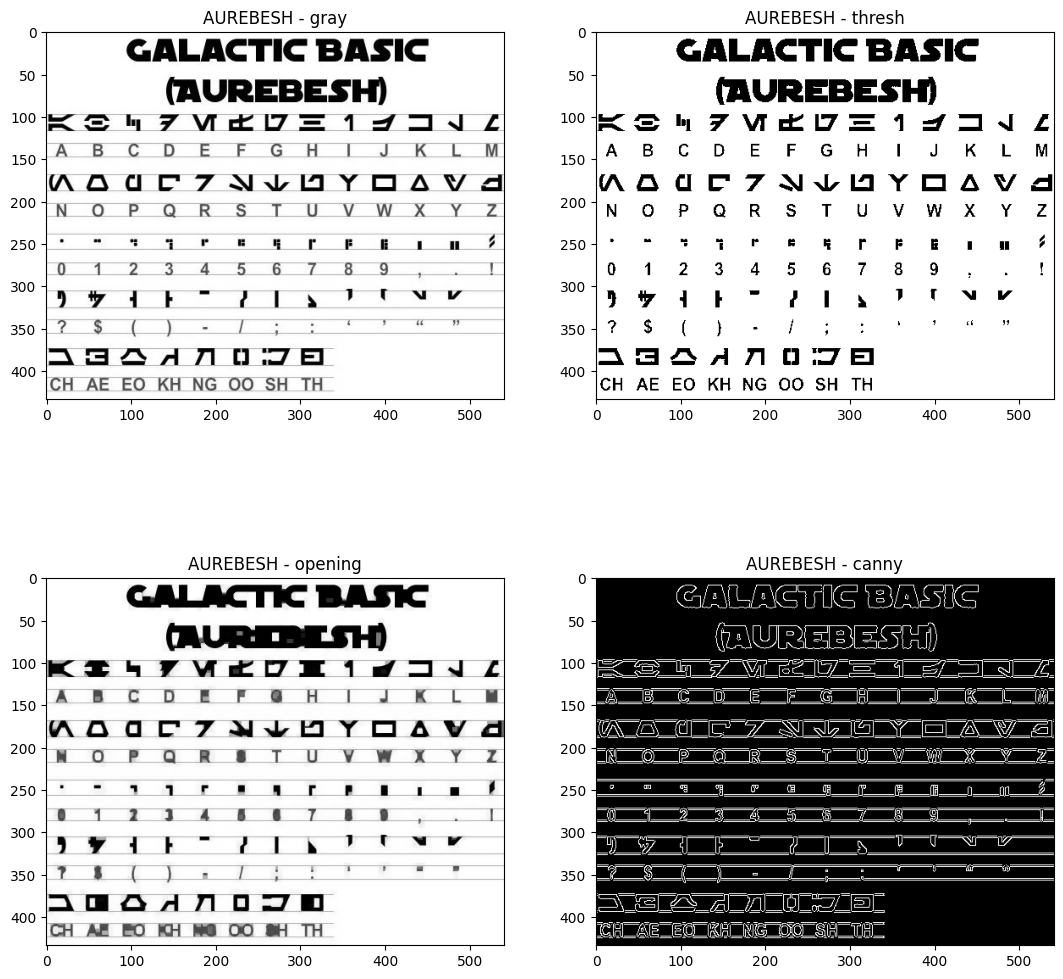

In [10]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('AUREBESH - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

**Keterangan :**

1. fig = plt.figure(figsize=(13,13))
  
  Membuat objek figure baru dengan ukuran 13x13 inci untuk menampilkan gambar.

2. ax = []
  
  Membuat list kosong untuk menyimpan subplot (sumbu) yang akan digunakan untuk menampilkan gambar.


3. rows = 2 dan columns = 2
  
  Menentukan jumlah baris dan kolom untuk layout gambar, sehingga akan ada 2 baris dan 2 kolom, total 4 gambar.

4. keys = list(images.keys())
  
  Mengambil nama-nama kunci (seperti 'gray', 'thresh', 'opening', dan 'canny') dari dictionary images dalam bentuk list.

5. for i in range(rows*columns):
  
  Melakukan iterasi untuk menampilkan setiap gambar (4 gambar, karena rows * columns = 2 * 2 = 4).

6. ax.append(fig.add_subplot(rows, columns, i+1))

  Menambahkan subplot pada figure berdasarkan posisi (i+1), sesuai dengan jumlah baris dan kolom yang telah ditentukan.

7. ax[-1].set_title('AUREBESH - ' + keys[i])
  
  Menambahkan judul pada setiap subplot dengan nama gambar yang sedang diproses, seperti 'AUREBESH - gray', 'AUREBESH - thresh', dll.

8. plt.imshow(images[keys[i]], cmap='gray')

  Menampilkan gambar yang sesuai dengan kunci di dictionary images pada subplot saat ini. Gambar ditampilkan dalam skala abu-abu (cmap='gray').

----
----

**Hasil Akhir :**


Kode ini akan menampilkan 4 gambar hasil preprocessing (skala abu-abu, thresholding, opening, dan deteksi tepi) dalam sebuah layout 2x2.
Setiap gambar akan diberi judul sesuai dengan tahap preprocessing yang diterapkan.

Langkah selanjutnya akan kita lakukan ekstraksi data dari images tersebut dengan teknik OCR melalui code berikut

In [11]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)

RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
Ss eg ei
ed
i a a Sy ee ee ee
st
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)

RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
Ss eg ei
ed
i a a Sy ee ee ee
st
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)

RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
Ss eg ei
ed
i a a Sy ee ee ee
st
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> CANNY EDGE IMAGE
-------

**Keterangan :**

1. custom_config = r'--oem 3 --psm 6'
  
  Menentukan konfigurasi kustom untuk Tesseract OCR.
    - --oem 3: Menggunakan mode OCR Engine yang otomatis memilih model terbaik.
    - --psm 6: Mengatur Page Segmentation Mode (PSM) ke mode 6, yang digunakan untuk gambar dengan teks tunggal dalam blok.

2. print('-----------------------------------------')

  Menampilkan garis pemisah untuk kejelasan output.

3. print('TESSERACT OUTPUT --> ORIGINAL IMAGE')

  Mencetak judul untuk output OCR pada gambar asli.

4. print(pytesseract.image_to_string(image, config=custom_config))

  Menggunakan Pytesseract untuk mengekstrak teks dari gambar asli (image) dengan konfigurasi yang telah ditentukan.

5. print('\n-----------------------------------------')

  Menampilkan garis pemisah setelah output dari gambar asli.

6. Langkah yang Sama untuk Gambar Lain

  Langkah-langkah serupa diulang untuk gambar hasil thresholding, opening, dan deteksi tepi (Canny), masing-masing mencetak output OCR untuk gambar tersebut.

----
----

**Penjelasan Output :**

Tesseract OCR akan mencoba mengekstrak teks dari gambar yang telah diproses (baik gambar asli maupun gambar yang telah diproses dengan berbagai teknik seperti thresholding, opening, dan deteksi tepi).
Proses ini dapat digunakan untuk mengidentifikasi dan mengekstrak teks dari gambar yang berisi tulisan.

----
----

**Catatan:**

Hasil OCR bisa bervariasi tergantung pada kualitas gambar dan teknik preprocessing yang digunakan. Misalnya, gambar thresholding atau opening mungkin memberikan hasil yang lebih baik dibandingkan gambar asli atau gambar dengan deteksi tepi, tergantung pada teks yang ada.

----
----

# **PRAKTIKUM 2**

Mendapatkan bounding box di sekitar teks pada image


----
----

**Deskripsi**

Saat menjalankan gambar melalui mesin Tesseract OCR, pytesseract memungkinkan pengguna untuk memperoleh informasi bounding box pada:

1. Tingkat karakter,

2. Tingkat kata,

3. Berdasarkan pola regex.

Pada praktikum ini, akan dijelaskan cara memperoleh kedua jenis informasi tersebut.

## **Bounding Box - Level Karakter**

Dengan menggunakan Pytesseract, Anda dapat memperoleh informasi bounding box untuk hasil OCR dengan menggunakan kode berikut.

Skrip di bawah ini akan memberikan informasi bounding box untuk setiap karakter yang terdeteksi oleh tesseract selama proses OCR.

In [14]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,550 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [15]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
IMG_DIR = 'images-ocr/images/'

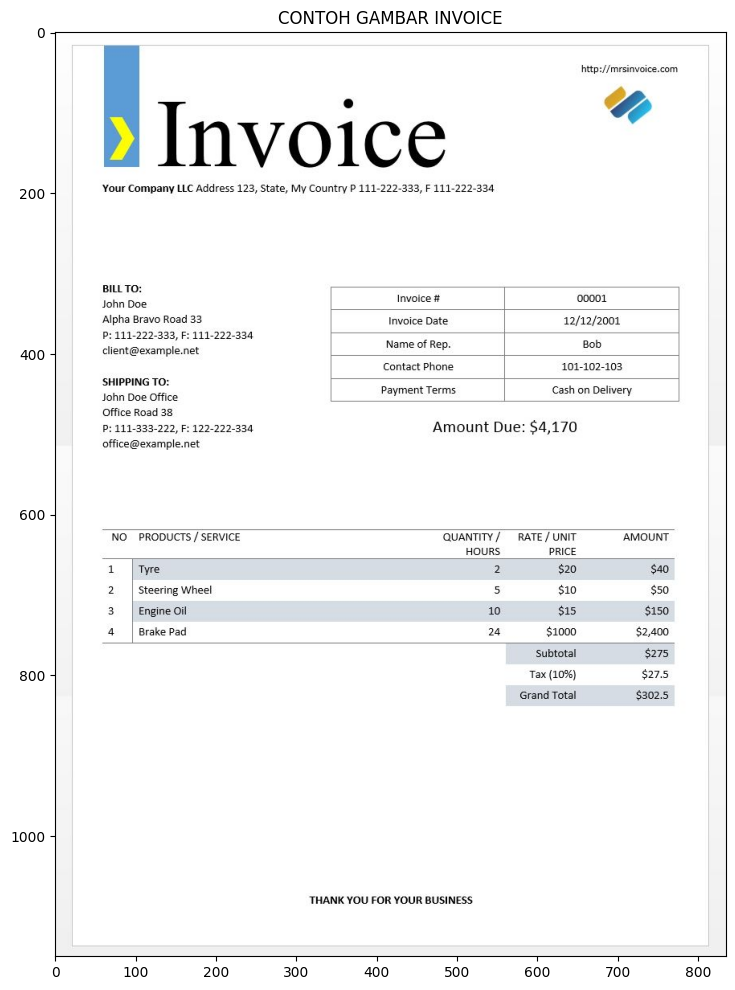

In [12]:
# Plot gambar original

# Membaca gambar dari direktori
image = cv2.imread('/content/drive/MyDrive/ML/images-ocr/images/invoice-sample.jpg')

# Memisahkan saluran warna (blue, green, red) karena matplotlib menggunakan skema warna RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dalam ukuran tertentu
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH GAMBAR INVOICE')
plt.show()


**Keterangan :**

Kode ini membaca gambar dari path yang ditentukan, mengonversi format warna dari BGR (OpenCV) ke RGB (untuk ditampilkan dengan matplotlib), dan menampilkan gambar dengan ukuran yang lebih besar serta judul.

Langkah selanjutnya adalah, Plot karakter boxes pada gambar menggunakan fungsi pytesseract.image_to_boxes()

kode program berikut akan memberikan hasil bounding box pada image invoice

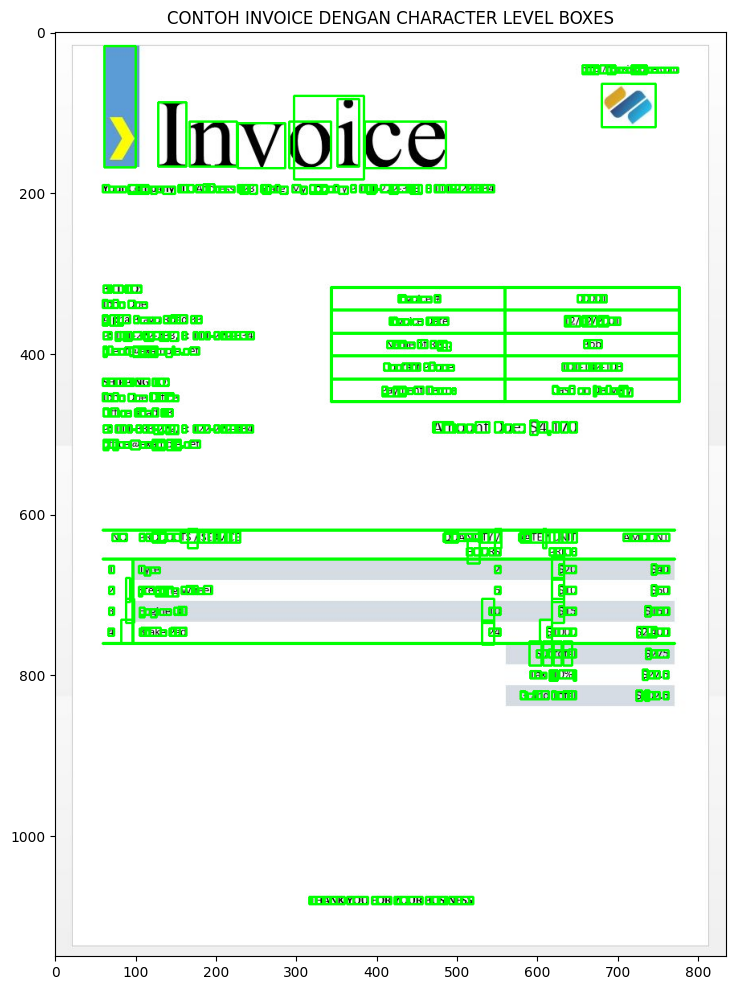

In [16]:
# Membaca gambar dari direktori
image = cv2.imread('/content/drive/MyDrive/ML/images-ocr/images/invoice-sample.jpg')

# Mendapatkan dimensi tinggi (h), lebar (w), dan channel warna (c) dari gambar
h, w, c = image.shape

# Menggunakan pytesseract.image_to_boxes() untuk mendapatkan informasi kotak karakter
boxes = pytesseract.image_to_boxes(image)

# Iterasi melalui setiap baris hasil dan membuat kotak pada gambar menggunakan OpenCV
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak karakter
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN CHARACTER LEVEL BOXES')
plt.show()


**Keterangan :**

Kode ini mendeteksi posisi karakter dalam gambar menggunakan Tesseract OCR, menggambar kotak di sekitar setiap karakter, mengonversi gambar dari BGR ke RGB, dan menampilkannya menggunakan matplotlib. Hasilnya adalah gambar invoice dengan kotak hijau yang menunjukkan lokasi karakter di dalam gambar.

## **Bounding Box - Level Kata**

langkah Selanjutnya kita akan menggunakan gambar contoh invoice di atas untuk menguji hasil output dari Tesseract.

Pada Code berikut akan digunakan untuk membaca gambar contoh invoice, kemudian menggunakan fungsi pytesseract.image_to_data() untuk mendapatkan data teks dari gambar.

In [17]:
# Membaca gambar contoh invoice
image = cv2.imread('/content/drive/MyDrive/ML/images-ocr/images/invoice-sample.jpg')

# Menggunakan pytesseract.image_to_data() untuk mendapatkan data teks dari gambar
d = pytesseract.image_to_data(image, output_type=Output.DICT)

# Menampilkan kunci-kunci data yang diperoleh dari hasil OCR
print('DATA KEYS: \n', d.keys())


DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


**Keterangan :**

Ketika kode dijalankan, output akan berisi daftar kunci yang ada dalam dictionary hasil OCR. Beberapa kunci yang umumnya ada dalam hasil image_to_data() adalah:

* text: Menyimpan teks yang terdeteksi pada masing-masing kotak.
* left: Koordinat kiri atas kotak (x1).
* top: Koordinat atas kotak (y1).
* width: Lebar kotak.
* height: Tinggi kotak.
* conf: Nilai kepercayaan OCR untuk teks yang terdeteksi.
* line_num: Nomor baris dari teks.
* block_num: Nomor blok teks (untuk mendeteksi lebih dari satu blok teks).

Dengan kunci-kunci ini, kita dapat mengekstrak dan memproses informasi lebih lanjut dari hasil OCR, seperti posisi setiap kata atau karakter dalam gambar.

Selanjutnya pada code berikut digunakan untuk memfilter dan hanya menampilkan kotak-kotak kata yang memiliki tingkat kepercayaan (confidence) lebih dari 60%. Hasilnya, gambar contoh invoice akan ditampilkan dengan kotak-kotak yang menandai lokasi setiap kata dengan tingkat kepercayaan yang memenuhi syarat.

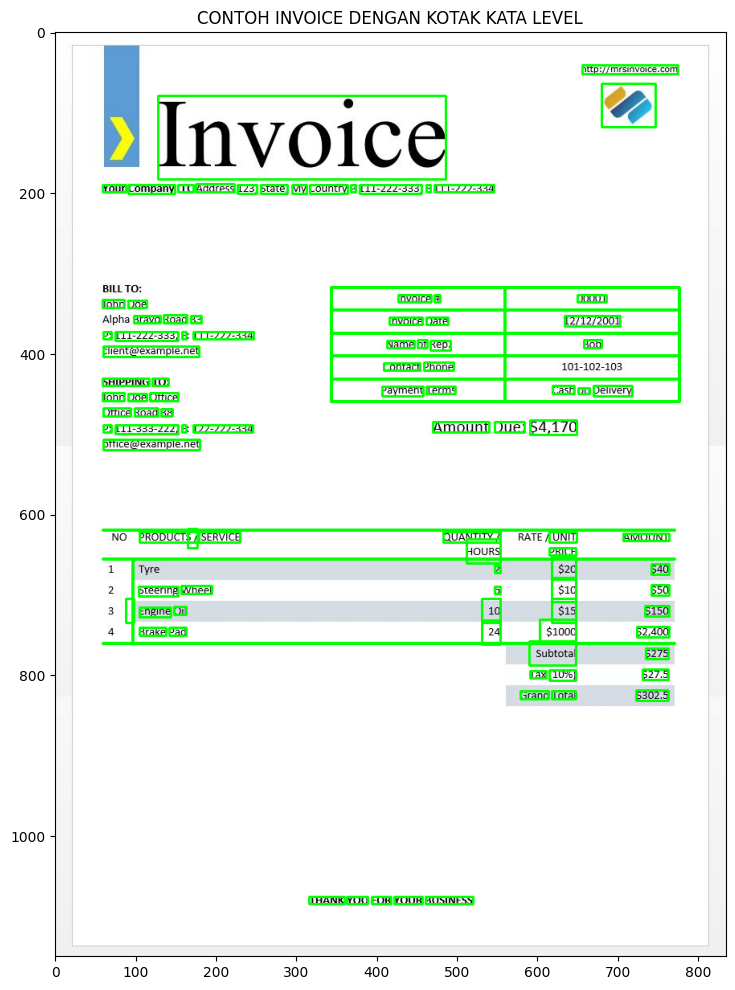

In [18]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    # Kondisi untuk hanya memilih kotak dengan kepercayaan > 60%
    if int(d['conf'][i]) > 60:
        # Mendapatkan koordinat dan ukuran kotak kata
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Membuat kotak pada gambar untuk kata dengan kepercayaan > 60%
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak kata berdasarkan kepercayaan > 60%
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN KOTAK KATA LEVEL')
plt.show()


**Keterangan :**

Kode ini akan menampilkan gambar dari invoice dengan kotak hijau yang mengelilingi setiap kata yang terdeteksi, jika OCR memberikan kepercayaan lebih dari 60% untuk kata tersebut. Dengan cara ini, hanya kata-kata dengan tingkat akurasi yang tinggi yang akan dipilih dan ditandai.


## **Text Template Matching - Pola Regex**

Misalkan kita ingin menemukan di mana suatu tanggal berada dalam sebuah gambar. Di sini, template yang kita akan gunakan berupa pola ekspresi reguler yang akan kita cocokkan dengan hasil OCR kita untuk menemukan kotak-kotak pembatas yang sesuai. Kita akan menggunakan modul regex dan fungsi image_to_data untuk hal ini.

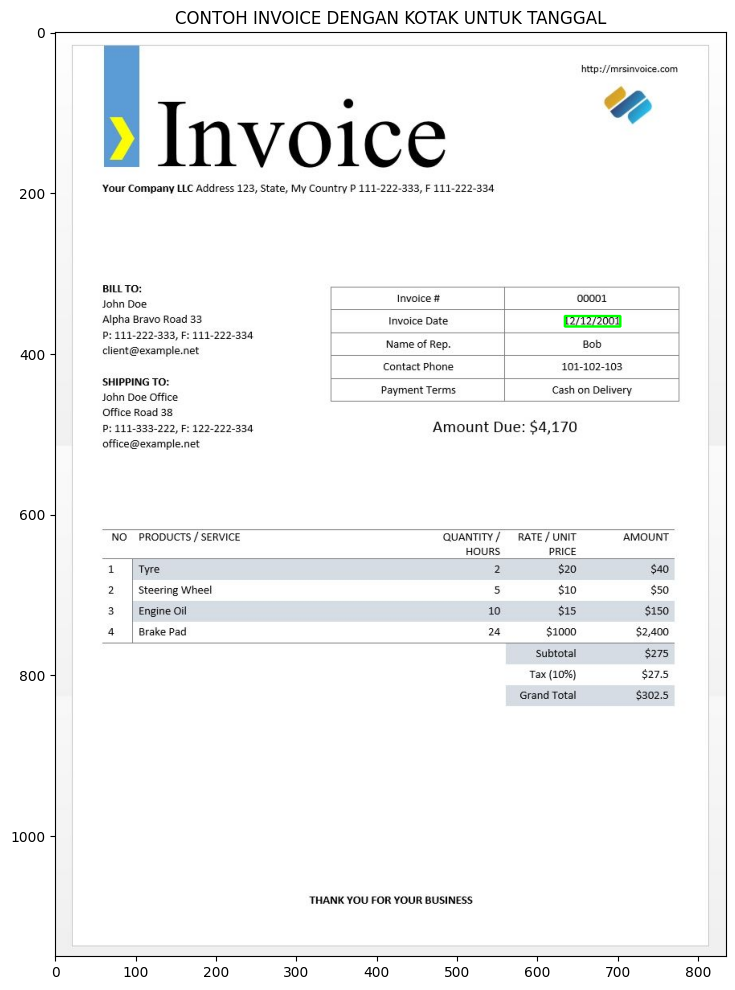

In [19]:
image = cv2.imread('/content/drive/MyDrive/ML/images-ocr/images/invoice-sample.jpg')

# Pola tanggal dalam format dd/mm/yyyy
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    # Memeriksa apakah kotak memiliki tingkat kepercayaan lebih dari 60%
    if int(d['conf'][i]) > 60:
        # Memeriksa apakah teks di dalam kotak sesuai dengan pola tanggal
        if re.match(date_pattern, d['text'][i]):
            # Mendapatkan koordinat dan ukuran kotak kata
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            # Membuat kotak pada gambar untuk tanggal yang sesuai dengan pola
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak-kotak yang menandai lokasi tanggal
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN KOTAK UNTUK TANGGAL')
plt.show()


**Keterangan :**

Kode ini akan menampilkan gambar invoice dengan kotak hijau di sekitar teks yang terdeteksi sebagai tanggal dalam format dd/mm/yyyy. Kotak-kotak tersebut hanya akan digambar untuk teks yang memiliki tingkat kepercayaan lebih dari 60% dan sesuai dengan pola tanggal yang diberikan.

## **Deteksi Berbagai Bahasa - OCR**

Untuk menetapkan bahasa yang diinginkan untuk hasil OCR Anda, gunakan argumen -l LANG dalam konfigurasi di mana LANG adalah kode tiga huruf untuk bahasa yang ingin Anda gunakan.

Kode berikut digunakan untuk membaca dan menampilkan gambar yang berisi teks dalam beberapa bahasa. Gambar asli ditampilkan untuk memberikan gambaran tentang kontennya sebelum proses OCR.

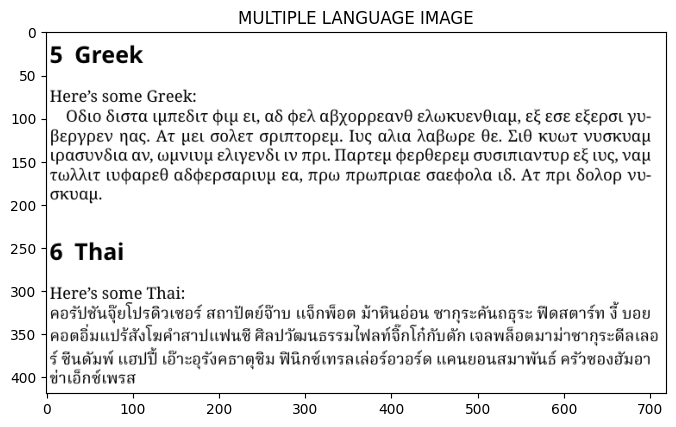

In [20]:
# Membaca gambar asli
image = cv2.imread('/content/drive/MyDrive/ML/images-ocr/images/greek-thai.png')

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar asli
plt.figure(figsize=(8, 16))
plt.imshow(rgb_img, cmap='gray')
plt.title('MULTIPLE LANGUAGE IMAGE')
plt.show()

**Keterangan :**

Gambar yang berisi teks dalam beberapa bahasa akan ditampilkan dengan ukuran yang sesuai, dengan saluran warna yang telah disesuaikan agar tampil dengan benar.

Selanjutnya, Kode berikut digunakan untuk mengekstrak teks dari gambar dengan menggunakan Tesseract OCR. Konfigurasi khusus (custom_config) diterapkan dengan hanya menentukan bahasa Inggris (-l eng). Parameter lain seperti --oem 3 dan --psm 6 juga digunakan untuk mengoptimalkan hasil OCR sesuai kebutuhan.

In [21]:
# Output dengan hanya bahasa Inggris yang ditentukan

# Konfigurasi khusus dengan hanya bahasa Inggris yang diatur
custom_config = r'-l eng --oem 3 --psm 6'

# Menggunakan pytesseract.image_to_string() untuk mendapatkan teks dari gambar dengan konfigurasi khusus
print(pytesseract.image_to_string(image, config=custom_config))



5 Greek
Here’s some Greek:

OSto Stota tuMedit Huy et, aS ea aByoppeave edAwkvevOuay, e§ ece efepot yu-
Bepypev nas. AT Wel GoAET apiTtopen. Tug aAta AaBwpe Ve. LO KUWT VUoKLaL
(paovvéia av, WUVLUU eAtyevil tv mpL TMaptep bepSepey GvaTLAaVTUp e€€ LUG, Va
TWAALT LUdaped ASdepoapluy Ea, TOW TpwTplae Gaedoda 16. AT mpt SoAop vv-
oxvau.

6 Thai

Here’s some Thai: .
aosUsugulushawos amiaddw usntioa sinfudou winszduagss Haaonsn 3 vos
Aonduusaladrawunud AavTausssulwavianlAdudn wandoamnsiwinsedataa
$ Guduvi woud rvaseasiadu Windinsadosor0sa uausouanrwus aswouduer
didadinsa



**Keterangan :**

Teks yang berhasil dideteksi dalam gambar dan berbahasa Inggris akan ditampilkan pada konsol. Dengan konfigurasi ini, Tesseract akan mengabaikan teks dalam bahasa selain Inggris, seperti teks dalam bahasa Yunani atau Thailand, dan hanya mengekstrak teks yang relevan dalam bahasa Inggris.

# **Tugas**

**Mendeteksi orientasi teks dan jenis skrip**

Tugas ini bertujuan untuk mendeteksi orientasi teks dan jenis skrip yang digunakan dalam suatu gambar menggunakan tesseract.

**Tugas**

1. **Persiapan Gambar**

In [22]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [23]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
IMG_DIR = 'images-ocr/images/'

* Gunakan gambar contoh yang disediakan ('hitchhikers-rotated.png').

In [26]:
# Membaca gambar dari direktori
image_path = '/content/drive/MyDrive/ML/images-ocr/images/hitchhikers-rotated.png'
image = cv2.imread(image_path)

**Keterangan :**

Gambar dibaca menggunakan OpenCV (cv2.imread())

* Tampilkan gambar asli menggunakan Python dan OpenCV.

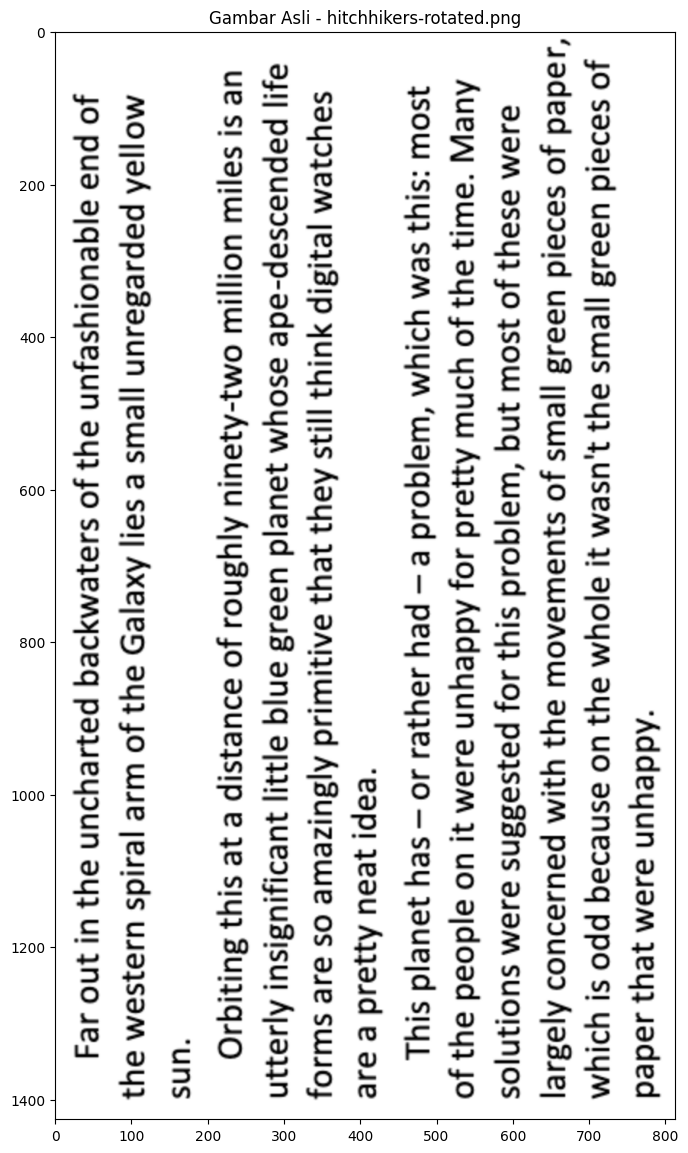

In [28]:
# Memisahkan channel warna (BGR ke RGB)
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar asli tanpa rotasi menggunakan matplotlib
plt.figure(figsize=(8, 16))
plt.imshow(rgb_img)
plt.title('Gambar Asli - hitchhikers-rotated.png')
plt.show()

**Keterangan :**

* Gambar yang dibaca menggunakan OpenCV tetap dalam format BGR, sehingga dilakukan konversi ke RGB menggunakan cv2.split() dan cv2.merge().
* Kemudian gambar ditampilkan dengan menggunakan plt.imshow() dari matplotlib tanpa memutarnya.
* Ukuran gambar disesuaikan dengan figsize agar lebih jelas terlihat saat ditampilkan.

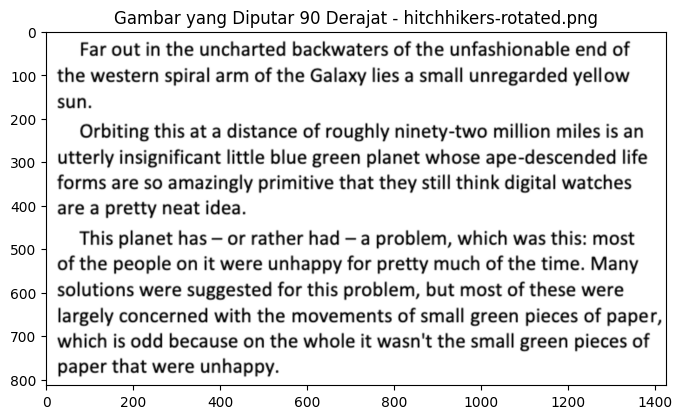

In [30]:
# Memutar gambar 90 derajat searah jarum jam
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Memisahkan channel warna (BGR ke RGB) setelah rotasi
b, g, r = cv2.split(rotated_image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar yang telah diputar 90 derajat menggunakan matplotlib
plt.figure(figsize=(8, 16))
plt.imshow(rgb_img)
plt.title('Gambar yang Diputar 90 Derajat - hitchhikers-rotated.png')
plt.show()

**Keterangan :**

* cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE) digunakan untuk memutar gambar 90 derajat searah jarum jam.
* Gambar yang sudah diputar kemudian dikonversi dari BGR ke RGB dengan cv2.split() dan cv2.merge().
* Gambar yang telah diputar kemudian ditampilkan menggunakan plt.imshow().

2. **Deteksi Orientasi dan Skrip**

* Implementasikan skrip Python untuk mendeteksi orientasi teks dalam gambar.

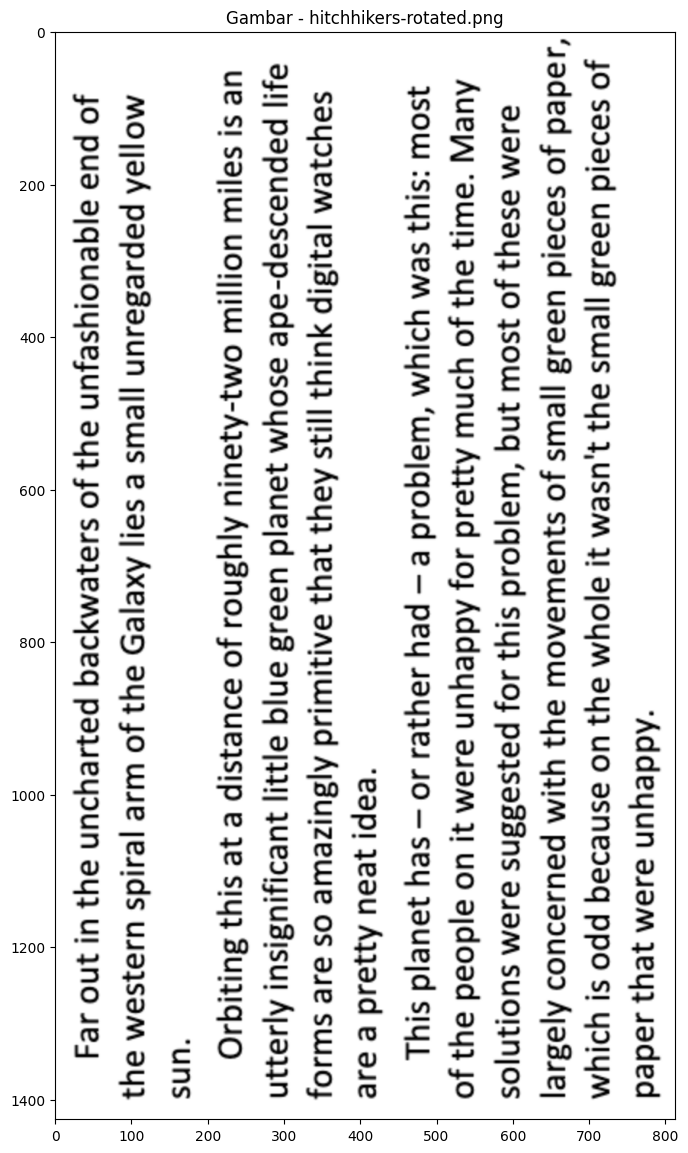

In [34]:
image_path = '/content/drive/MyDrive/ML/images-ocr/images/hitchhikers-rotated.png'
image = cv2.imread(image_path)

b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar menggunakan matplotlib
plt.figure(figsize=(8, 16))
plt.imshow(rgb_img)
plt.title('Gambar - hitchhikers-rotated.png')
plt.axis('on')
plt.show()

**Keteangan :**
Gambar dari hitchhikers-rotated.png akan muncul dalam tampilan yang benar, dengan ukuran yang telah ditentukan dalam plt.figure(figsize=(8, 16)).



* Gunakan Tesseract untuk mendapatkan sudut rotasi (angle) dan jenis skrip (script).

In [36]:
osd_data = pytesseract.image_to_osd(image, output_type=Output.DICT)

**Keterangan :**

- pytesseract.image_to_osd() digunakan untuk mendapatkan informasi orientasi (angle) dan jenis skrip yang digunakan dalam gambar.
- output_type=Output.DICT digunakan untuk mendapatkan hasil dalam bentuk dictionary, yang mencakup informasi seperti sudut rotasi (rotate) dan jenis skrip (script).

* Tampilkan hasil orientasi dan jenis skrip.

Orientasi Teks (Angle): 90
Jenis Skrip: Latin


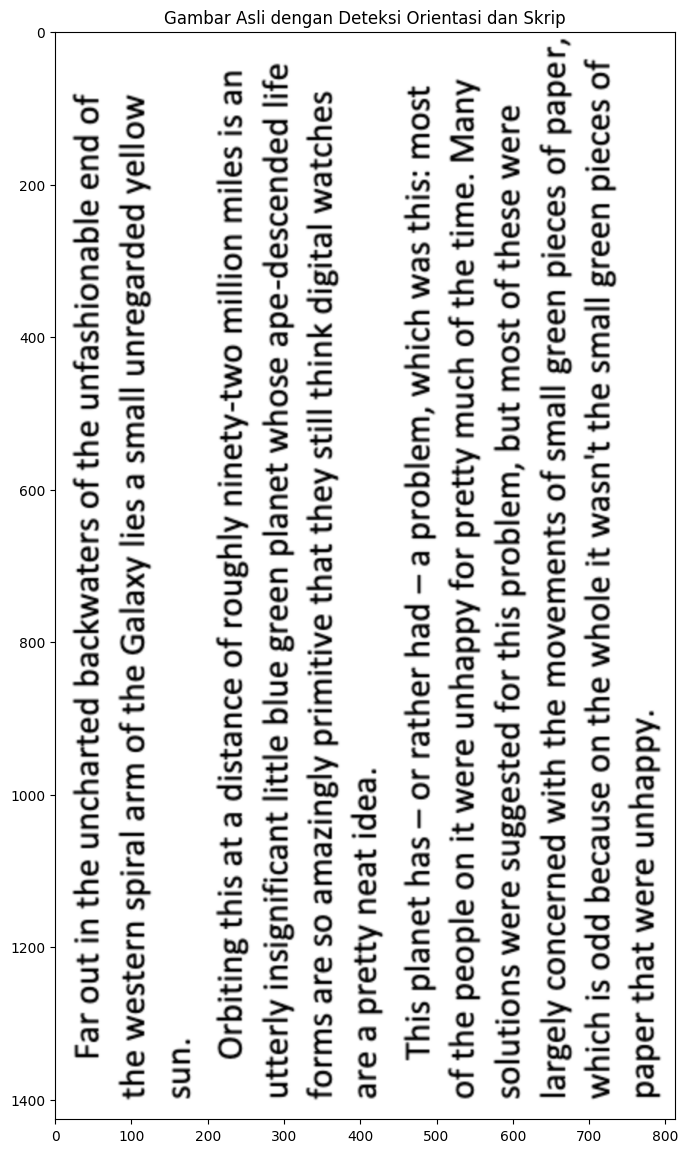

In [37]:
# Menampilkan hasil orientasi dan jenis skrip
print("Orientasi Teks (Angle):", osd_data['rotate'])
print("Jenis Skrip:", osd_data['script'])

# Menampilkan gambar dengan orientasi yang terdeteksi
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar menggunakan matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 16))
plt.imshow(rgb_img)
plt.title('Gambar Asli dengan Deteksi Orientasi dan Skrip')
plt.show()

**Keterangan :**

- Orientasi Teks (Angle): Menampilkan sudut rotasi teks yang terdeteksi (misalnya 0, 90, 180, 270).
- Jenis Skrip: Menampilkan jenis skrip yang terdeteksi seperti Latin, Cyrillic, atau lainnya.
- Gambar yang Ditampilkan: Menampilkan gambar yang sesuai dengan orientasi yang terdeteksi.